# Chapter 1

## Time series data versus IID data 

A typical setup for statistical analysis assumes that a series of experiments generate observations that are independent and identically distributed~(often abbreviated i.i.d). 
For example, 

\begin{align}
    \mathcal{D} &= ( y_{1}, y_{2}, \cdots, y_{n}   ) \\ 
    y_{i} &\sim \text{Poisson}(\lambda)
\end{align}

where we use $\mathcal{D}$ to represent a dataset, lower case letters to represent collected observations, capital letters to represent random variables, and greek letters to represent parameters. 
Because we assume that the above observations were generated from a sequence of i.i.d poisson random variables, we can simplify expressions that incldue the probability of $Y_{1}, Y_{2}, \cdots$. 

\begin{align}
    P(Y_{1}, Y_{2}) &= P(Y_{1}) \cdot P(Y_{2}) \\ 
    P(Y_{1}, Y_{2}, \cdots, Y_{n}) &= P(Y_{1}) \cdot P(Y_{2}) \cdots P(Y_{n}) = \prod_{i=1}^{n} P(Y_{i}) \\ 
    & = \lambda^{\sum_{i=1}^{n} y_{i} } \frac{e^{ -n\lambda }}{ \prod_{i=1}^{n} y_{i}! } \propto e^{ -n\lambda }\lambda^{\sum_{i=1}^{n} y_{i} }
\end{align}

The expression above is an (often good) approximation of the joint probability of observing all $n$ data points at once. 
Unlike more traditional data collections mechanisms, for time series data we cannot assume that the observations are i.i.d.
Instead, we assume that observations at time $t$ deoend on all previous random variables before time $t$. 
Then, we cannot simplify the joint probability of the first $t$ random variables as their product. 

Recall the multiplication rule 

\begin{align}
    P(A,B,C) &= P( B,C | A ) P(A) \\ 
              &= P( C | B, A ) P(B|A) P(A)
\end{align}

We can still use the multiplication rule to assess the joint probability of a sequence of random variables.
Lets assume that we wish to model some time seres process from time unit one up until time unit $T$. 
Then we need to estimate probabilities like 

\begin{align}
    P( Y_{1}, Y_{2}, \cdots, Y_{T}  ) = P(Y_{0})\cdot P(Y_{1} | Y_{0}) \cdot P(Y_{2} | Y_{1},Y_{0}) \cdots P(Y_{T} | Y_{T-1} \cdots Y_{0})
\end{align}

The i.i.d assumption simplifies the above by assuming that each random variable is independent of all others. 
For time series, we want to simplify the above but still keep the most important characteristics of the process---that observations in the future depend on the past. 

### Markov Assumption 

Given a series of random variables, the Markov assumption states that the probability of $Y_{t}$ depends only on the random variable at time $t-1$, or 

\begin{align}
    P(Y_{t} | Y_{t-1}, Y_{t-2}, \cdots Y_{1}) \approx  P(Y_{t} | Y_{t-1})
\end{align}

The markov assumption aims to capture the most basic attribute of a time series, that future values depend on the recent past, without the more restrictive property that future values depend on **all** of the past. 

This simplified considerably the above 

\begin{align}
    P( Y_{1}, Y_{2}, \cdots, Y_{T}  ) &= P(Y_{0})\cdot P(Y_{1} | Y_{0}) \cdot P(Y_{2} | Y_{1},Y_{0}) \cdots P(Y_{T} | Y_{T-1} \cdots Y_{0}) \\ 
    & \approx P(Y_{0}) \cdot P(Y_{1} | Y_{0}) \cdot P(Y_{2} | Y_{1}) \cdots  \\ 
    & = P(Y_{0}) \prod_{t=1}^{T} P(Y_{t} | Y_{t-1})
\end{align}



## Influenza-like illness

The Centers for Disease Control and Prevention collect a dataset about influenza-like illness,or ILI.
ILI is a non-specific syndrome defined as fever (temperature of 100°F(37.8°C) or greater) and a cough and/or a sore throat. It is used for flu surveillance worldwide. ILI can be similar to the flu but can be caused by other respiratory virus.

### Why is it important ?
### How is it used ?
### What does it inform ?
Influenza viruses are constantly undergoing minor changes and can also undergo abrupt major changes. Surveillance of the viruses can help to monitor and  detect these changes helping to inform the public health response. Influenza vaccinations are updates reguarly based on surveillance findings. The Surveillance can also be used to monitor the impact and effectiveness of the prevention measures like the vaccines. ILI data is evaulated in the context of other surveillance data to obtain a complete and accurate picture of Influenza activity.

It creates National and regional baselines for Influenza and ILI. Finding out when and where Influenza activity is occuring.

### Are there any weirdnesses with it? 
ILI data is 2 weeks behind.ILI and Influenza data is measued in epiweeks (see discription below). The season typically begins around Week 40, late September/ early October, and runs though Week 39 of the following year. ILI is not lab confirmed, allowing information to be gathered and reported quicker. On the other hand it is highly influenced by human behavior and the data heavily relys on health-seeking behavior.

## ILI_Data Variable Descriptions

Delphi_Epidata FluView includes Influenza-like illness (ILI) data from the U.S. Outpatient Influenza-like Illness Surveillance Network (ILINet). 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

d = pd.read_csv("./data/ili_data.csv") 
print(d.head())

  release_date region   issue  epiweek  lag  num_ili  num_patients  \
0   2017-10-24   hhs1  201740   201501  143      915         48019   
1   2017-10-24  hhs10  201740   201501  143      446         13386   
2   2017-10-24   hhs2  201740   201501  143     4203        125197   
3   2017-10-24   hhs3  201740   201501  143     7757        131608   
4   2017-10-24   hhs4  201740   201501  143     4653        126559   

   num_providers  num_age_0  num_age_1  num_age_2  num_age_3  num_age_4  \
0            151        241        341        NaN        158         95   
1             76        131        129        NaN         89         63   
2            210       1362       1320        NaN        851        381   
3            247       1190       1996        NaN       2520       1062   
4            306       1099       1568        NaN       1066        507   

   num_age_5     wili      ili  
0         80  1.94392  1.90550  
1         34  3.10944  3.33184  
2        289  4.28873  3.3571


|Variable | Description | 
|:----------|:-----------------|
| release_date | The date (not in epiweeks) on which the data was published by the CDC, it signifies the end of the reporting lag for that week's publication cycle. **YYYY-MM-DD**|
| regions |HHS regions are 10 distinct geographic areas designated by the U.S. Department of Health and Human Services (HHS) to efficiently manage and tailor federal services across the country. \*see below for specific regions\*|
| issue | The epiweek that the data was published by the CDC. Due to the fact this data is updated weekly, the report may be re-issued in a following week as more records and or results come in. |
| epiweeks | A standardized, 7 day period (Sunday to Sunday), used for public health surveillance to ensure consistency when tracking disease activity. Weeks go from 1 - 52/53 depending on the year. **YYYYWW** |
| lag | Number of weeks between each epiweek and its issue. Higher the lag the more accurate the numbers. |
| num_ili | Total number of patient visits for influenza-like-illness. Used to calculate wili and ili. |
| num_patients | Total number of patient visits, for any reason, seen by the reporting healthcare providers. Also used to calculate wili and ili. |
| num_providers | Total number of healthcare providers that reported data to the CDC’s Fluview system for the specific week and region. |
| num_age_01 | Number of patient visits for ages 0-4years. |
| num_age_02 | Number of patient visits for ages 5-24 years. |
| num_age_03 | Number of patient visits for ages 25-49 years. |
| num_age_04 | Number of patient visits for ages 50-64 years. |
| num_age_05 | Number of patient visits for ages 65+ years. |
| wili | Weighted percent influenza-like illness, adjusted based on population. The proportion of outpatient doctor visits at reporting health care facilities where the patient had ILI, weighted by state population (% of state pop.).At the national level, WILI is computed using a sum of state population weighted ILI or it can be computed using regional population weighted WILI.|
| ili | Percent influenza-like illness. The ratio of patients presenting with ILI over the total number of patients presenting at health care providers.|

 > \* **nat:** National **hhs1:** Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont **hhs2:** New Jersey, New York, Puerto Rico, and the Virgin Islands **hhs3:** Delaware, District of Columbia, Maryland, Pennsylvania, Virginia, and West Virginia **hhs4:** Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina, and Tennessee **hhs5:** Illinois, Indiana, Michigan, Minnesota, Ohio, and Wisconsin **hhs6:** Arkansas, Louisiana, New Mexico, Oklahoma, and Texas **hhs7:** Iowa, Kansas, Missouri, and Nebraska **hhs8:** Colorado, Montana, North Dakota, South Dakota, Utah, and Wyoming **hhs9:** Arizona, California, Hawaii, Nevada, American Samoa, Northern Mariana Islands, Micronesia, Guam, Marshall Islands, and Republic of Palau **hhs10:** Alaska, Idaho, Oregon, and Washington


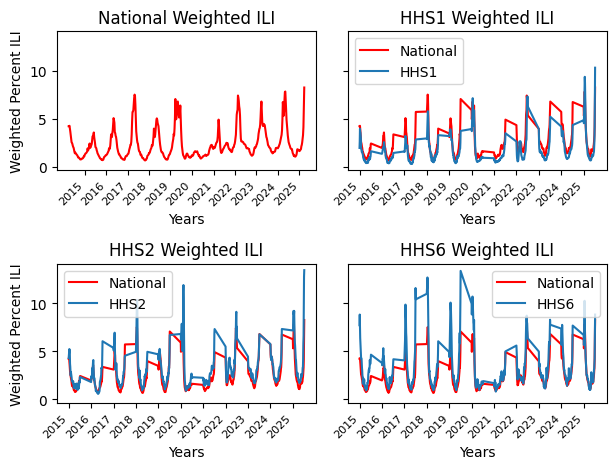

In [22]:
#--d 
import pandas as pd 
import matplotlib.pyplot as plt 

d = pd.read_csv("./data/ili_data.csv")  #<--using pandas to import a datset


#--plot ILI for all states in HHS1 
#--plot ILI for all states in HHS2
#--plot ILI for all states in HHS3
#--plot ILI for all states in HHS6

fig, axs = plt.subplots( 2,2, sharey =True  )  #<--This begins a figure and axes object.

d_nat = d.loc[ d.region == "nat" ].reset_index()
d_hhs1 = d.loc[ d.region == "hhs1" ].reset_index()
d_hhs2 = d.loc[ d.region == "hhs2" ].reset_index()
d_hhs6 = d.loc[ d.region == "hhs6" ].reset_index()

year = d_nat["epiweek"] //100
first_weeks = d_nat.groupby(year)["epiweek"].min()


axs[0,0].plot(d_nat["wili"], color = "Red")           #<--This does  
axs[0,0].set_title("National Weighted ILI")
axs[0,0].set_xlabel("Years")
axs[0,0].set_ylabel("Weighted Percent ILI")


d_nat["week"] = [  int(str(row.epiweek)[-2:])   for idx,row in d_nat.iterrows() ] 
d_nat["year"] = [  int(str(row.epiweek)[:-2])   for idx,row in d_nat.iterrows() ] 


x_ticks       = d_nat.loc[d_nat.week==40].index
x_tick_labels = d_nat.loc[d_nat.week==40, "year"]

axs[0,0].set_xticks(x_ticks)
axs[0,0].set_xticklabels(x_tick_labels, rotation =45, ha ="right", fontsize=8)














axs[0,1].plot(d_nat["epiweek"], d_nat["wili"], color = "Red", label ="National")
axs[0,1].plot(d_hhs1["epiweek"],d_hhs1["wili"],label = "HHS1")
axs[0,1].set_title("HHS1 Weighted ILI")
axs[0,1].set_xlabel("Years")
axs[0,1].set_xticks(first_weeks.values)
axs[0,1].set_xticklabels(first_weeks.index, rotation =45, ha ="right", fontsize=8)
axs[0,1].legend()

axs[1,0].plot(d_nat["epiweek"],d_nat["wili"], color = "Red", label ="National")
axs[1,0].plot(d_hhs2["epiweek"],d_hhs2["wili"],label = "HHS2")
axs[1,0].set_title("HHS2 Weighted ILI")
axs[1,0].set_xlabel("Years")
axs[1,0].set_ylabel("Weighted Percent ILI")
axs[1,0].set_xticks(first_weeks.values)
axs[1,0].set_xticklabels(first_weeks.index, rotation =45, ha ="right", fontsize=8)
axs[1,0].legend()

axs[1,1].plot(d_nat["epiweek"],d_nat["wili"],color = "Red",label ="National")
axs[1,1].plot(d_hhs6["epiweek"],d_hhs6["wili"],label = "HHS6")
axs[1,1].set_title("HHS6 Weighted ILI")
axs[1,1].set_xlabel("Years")
axs[1,1].set_xticks(first_weeks.values)
axs[1,1].set_xticklabels(first_weeks.index, rotation =45, ha ="right", fontsize=8)
axs[1,1].legend()

plt.tight_layout()
plt.show()


# plot time series for two state
#x is weeks
#y is percent ili (column_name = wILI)

,index,release_date,region,issue,epiweek,lag,num_ili,num_patients,num_providers,num_age_0,num_age_1,num_age_2,num_age_3,num_age_4,num_age_5,wili,ili,week,year
0,10,2017-10-24,nat,201740,201501,143,31483,771835,1958,7160,9589,NaN,8072,3614,3048,4.21374,4.07898,1,2015
1,21,2017-10-24,nat,201740,201502,142,31204,792459,1971,7044,11966,NaN,6946,2909,2339,4.21022,3.93762,2,2015
2,32,2017-10-24,nat,201740,201503,141,33221,800359,1966,7840,13949,NaN,6451,2951,2030,4.25968,4.15076,3,2015
3,43,2017-10-24,nat,201740,201504,140,30621,789407,1955,7118,13159,NaN,5844,2585,1915,3.97761,3.87899,4,2015
4,54,2017-10-24,nat,201740,201505,139,28151,814097,1950,6656,12093,NaN,5380,2368,1654,3.63443,3.45794,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,6258,2026-01-23,nat,202602,202548,7,70237,2300306,4330,15424,24202,NaN,16949,6558,7104,2.96072,3.05338,48,2025
569,6269,2026-01-23,nat,202602,202549,6,86948,2632227,4324,16134,28864,NaN,23305,9196,9449,3.28383,3.30321,49,2025
570,6280,2026-01-23,nat,202602,202550,5,113795,2661353,4338,19761,44578,NaN,27782,10346,11328,4.11745,4.27583,50,2025
571,6291,2026-01-23,nat,202602,202551,4,171250,2754847,4312,28889,69746,NaN,41265,14792,16558,5.99995,6.21632,51,2025


Index([39, 91, 143, 195, 247, 299, 352, 404, 456, 508, 560], dtype='int64')

### Build a scatterplot of ILI at time t versus ILI at time t-1 for national level. 
#### put a line of best fit on there and the correlation value. 
### Build a scatterplot of ILI at time t versus ILI at time t-7 for national level. 
#### put a line of best fit on there and the correlation value.

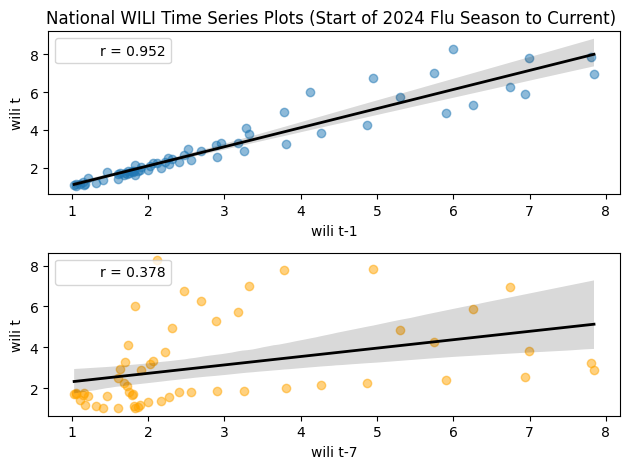

In [3]:
import seaborn as sns

d = pd.read_csv("./data/ili_data.csv") 
fig, axs = plt.subplots (2,1)

d_nat = d.loc[ d.region == "nat" ]
d_time = d_nat[["epiweek","wili"]]
d_recentszn = d_time.tail(65).copy()
d_recentszn["wili-1"] = d_recentszn["wili"].shift(1)
d_recentszn["wili-7"] = d_recentszn["wili"].shift(7)

df1 = d_recentszn[["wili", "wili-1"]].dropna()
reg1 = df1["wili"].corr(df1["wili-1"])

df2 = d_recentszn[["wili", "wili-7"]].dropna()
reg2 = df2["wili"].corr(df2["wili-7"])

sns.regplot(data=df1,
    x="wili-1",
    y="wili",
    ax=axs[0],
    scatter_kws={"alpha": 0.5},
    line_kws={"linewidth": 2, "color":"black"}
)

axs[0].set_title("National WILI Time Series Plots (Start of 2024 Flu Season to Current) ")
axs[0].set_xlabel("wili t-1")
axs[0].set_ylabel("wili t")
axs[0].plot([], [], ' ', label=f"r = {reg1:.3f}")
axs[0].legend(loc="upper left")

sns.regplot(data=df2,
    x="wili-7",
    y="wili",
    ax=axs[1],
    scatter_kws={"color":"orange","alpha": 0.5},
    line_kws={"linewidth": 2, "color":"black"}
)
axs[1].set_xlabel("wili t-7")
axs[1].set_ylabel("wili t")
axs[1].plot([], [], ' ', label=f"r = {reg2:.3f}")
axs[1].legend(loc="upper left")

plt.tight_layout()
plt.show()


## COVID Community mobility

COVID Community Mobility Reports aim to provide insights into what changed in response to policies aimed at combating COVID-19. The reports charted movement trends over time by geography, across different categories of places. The two graphs below show how activitychanged in retaila nd recreation and then parks. Some uses of this data is by public health officals to evaluate effectivness of lockdowns and reopening policies, government to assess complience with restrictions, and researchers to model where possible case surges may happen. 

Some weirdnesses to note about this data is the measure of baseline. These measures are relative to pre-pandemic movement and not the absolute movement. Some of the catagories also hold overlap for example, reatail and grocery. 

Data was collected from users who have opted-in to Location History for their Google Account, so the data represents a
sample of users. This can cause limitations because it was only collecting data from google map users. Some other limitations or missing information includes differentiation between indoor and outdoor interactions, essential workers who must travel, and availability to social distance within locations.

In [4]:
import pandas as pd
CM = pd.read_csv("./data/pa_covid.csv") #Import covid mobility data frame as CM
pa_CM= CM[CM["iso_3166_2_code"] == "US-PA"]
print(pa_CM.head())  #look at the first 5 rows of CM


  country_region_code country_region  sub_region_1 sub_region_2  metro_area  \
0                  US  United States  Pennsylvania          NaN         NaN   
1                  US  United States  Pennsylvania          NaN         NaN   
2                  US  United States  Pennsylvania          NaN         NaN   
3                  US  United States  Pennsylvania          NaN         NaN   
4                  US  United States  Pennsylvania          NaN         NaN   

  iso_3166_2_code  census_fips_code                     place_id        date  \
0           US-PA               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-02-15   
1           US-PA               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-02-16   
2           US-PA               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-02-17   
3           US-PA               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-02-18   
4           US-PA               NaN  ChIJieUyHiaALYgRPbQiUEchRsI  2020-02-19   

   retail_and_recreation_percent_change_from

|Variable | Description |
|:----------|:-----------------|
| country_region | Country of interest, in this case only looking at the US |
|sub_region_1 | looks at the state level, this only looks at PA |
| Date | shows the say data was collected|
| retail_and_recreation_percent_change_from_baseline| Change in visits to retail and recreation locations (restaurants, shopping centers, movie theaters) compared to baseline|
| grocery_and_pharmacy_percent_change_from_baseline | Change in visits to grocery stores, food warehouses, farmers markets, and pharmacies |
| parks_percent_change_from_baseline| Change in visits to parks, beaches, public gardens, and marinas |
| transit_stations_percent_change_from_baseline| Change in visits to public transport hubs such as subway, bus, and train stations |
| workplaces_percent_change_from_baseline| Change in attendance at workplaces|
| residential_percent_change_from_baseline| Change in time spent at places of residence|


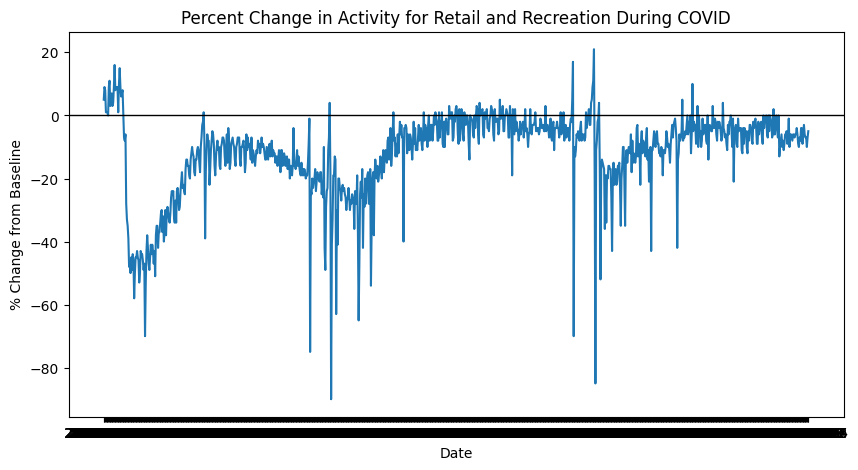

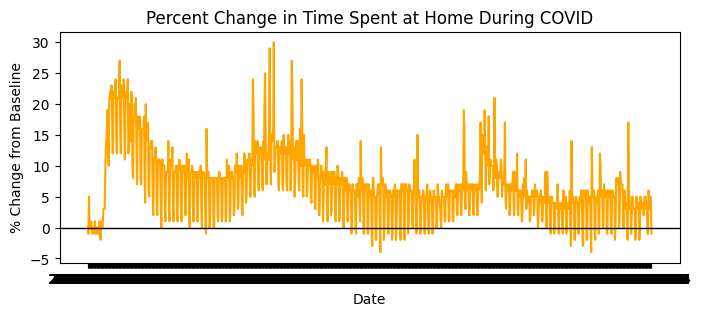

In [24]:
#--d 
import pandas as pd 
import matplotlib.pyplot as plt 


# a plot of one county time seires for two activities

plt.figure(figsize=(10, 5))                                                                   ##Plot of Retail and Recreation Change
plt.plot(pa_CM["date"],pa_CM["retail_and_recreation_percent_change_from_baseline"])
plt.xlabel("Date")
plt.ylabel("% Change from Baseline")
plt.title("Percent Change in Activity for Retail and Recreation During COVID")
plt.axhline(0, color="black", linewidth=1)
plt.show()


plt.figure (figsize=(8, 3))                                                     ## Plot of Time Spent at Home Percent Change 
plt.plot(pa_CM["date"],pa_CM["residential_percent_change_from_baseline"], color = "orange")
plt.xlabel("Date")
plt.ylabel("% Change from Baseline")
plt.title("Percent Change in Time Spent at Home During COVID")
plt.axhline(0, color="black", linewidth=1)
plt.show()



Bellow is an example of plotting the mobility at t-1. This is using yesterdays data to predict t

## 

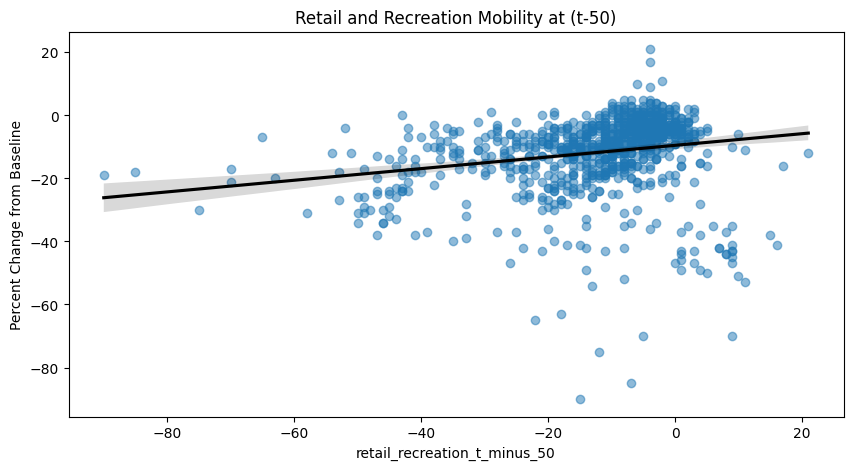

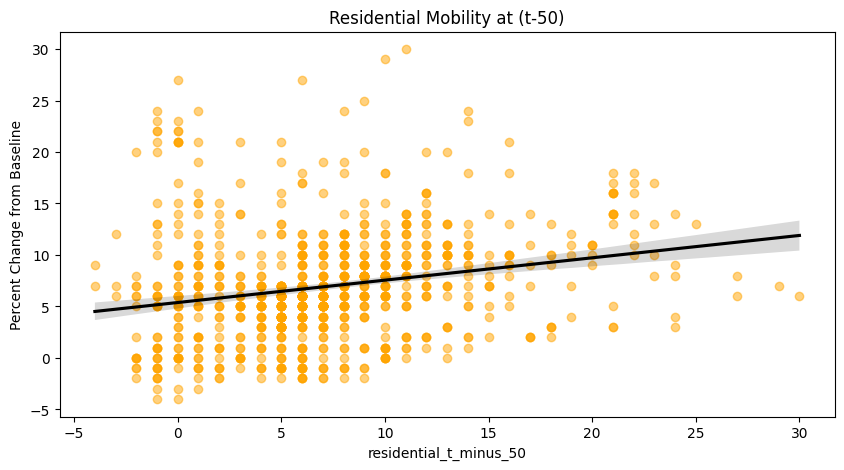

In [6]:
import seaborn as sns

pa_CM = pa_CM.sort_values("date") #Sorts data by date
pa_CM["retail_recreation_t_minus_50"] = (
    pa_CM["retail_and_recreation_percent_change_from_baseline"].shift(50)
) #Adds new vaiable for t-50 that looks at values 50 days before 
  
plt.figure(figsize=(10, 5))       #plots the percent change on yesterdays behavior for the day 

sns.regplot(x="retail_recreation_t_minus_50", y="retail_and_recreation_percent_change_from_baseline", 
            data= pa_CM, line_kws={"color": "black"}, scatter_kws= {"alpha": 0.5})
plt.title("Retail and Recreation Mobility at (t-50)")
plt.xlabel("retail_recreation_t_minus_50")
plt.ylabel("Percent Change from Baseline")
plt.show()

pa_CM["residential_t_minus_50"] = (
    pa_CM["residential_percent_change_from_baseline"].shift(50)
)
plt.figure(figsize=(10, 5))
sns.regplot(x="residential_t_minus_50", y="residential_percent_change_from_baseline",  data= pa_CM, 
            scatter_kws= {"color": "orange" , "alpha": 0.5} , line_kws={"color": "black"})
plt.title("Residential Mobility at (t-50)")
plt.xlabel("residential_t_minus_50")
plt.ylabel("Percent Change from Baseline")
plt.show()


MPOX IS VERY BAD YOU DO NOT WANT IT

## Mpox incidence

## Correlation, Covariance, and the Corrolelogram

In [7]:
# FFor ili we will wantt to plot the percent ILI at week t versus the percent ILI at week t+1

In [8]:
# FFor COVID we will wantt to plot the behaviro at week t versus the behavior at week t+1

## Smoothing methods

#### It may be worth looking at 8.1,8.2,8.5



https://otexts.com/fpp3/holt.html

When creating a prediction for a future time step there are 3 different approaches that could take place. 
        1. Using the last observation and carrying whatever that value was on for the rest of time
        2. Take a average of all the observations already seen and use that to predict the next time steps
        3. A combination of 1 and 2 which is also known as Simple Exponential Smoothing 



\begin{align} 
y_{T+h|T} &= \alpha y_T + (1 - \alpha)\hat{y}_{T|T-1}\\ 
\alpha & \in [0,1] 
\end{align}

$y_T$ is an observation at time T which is a future point


\begin{gather} 
\text{if}\ \alpha = 0\\ y_{T+h|T} = \hat{y}_{T|T-1}
\end{gather}

\begin{align} 
\text{if}\ \alpha &= 1\\ y_{T+h|T} &= 1 y_T
\end{align}

Let's take a look at an example. Let's assume h=1 and we want to make a prediction at T=4 so the formula would look like 
\begin{gather}
\hat{y}_{5|4} = \alpha y_4 + (1 - \alpha)\hat{y}_{4|3} \\
\text{With this formula you then have to look at the time step prediction that came before} \\
\hat{y}_{4|3} = \alpha y_3 + (1 - \alpha)\hat{y}_{3|2} \\
\text{You can then plug that back into the original formula and have} \\
\hat{y}_{5|4} = \alpha y_4 + (1 - \alpha)\bigl[\alpha y_3 + (1 - \alpha)\hat{y}_{3|2}] \\
\hat{y}_{5|4} = \alpha y_4 + \alpha(1-\alpha)y_3 + (1-\alpha)^2\hat{y}_{3|2}\\
\text{this process can then be repeated} \\
\hat{y}_{3|2} = \alpha y_2 + (1 - \alpha)\hat{y}_{2|1} \\
\hat{y}_{5|4} = \alpha y_4 + \alpha(1-\alpha)y_3 + (1-\alpha)^2[\alpha y_2 + (1 - \alpha)\hat{y}_{2|1}] \\
\hat{y}_{5|4}= \alpha y_4 + \alpha(1-\alpha)y_3 + \alpha(1-\alpha)^2y_2+\alpha(1-\alpha)^3y_1+(1-\alpha)\hat{y}_{1|0}\\
\hat{y}_{1|0} = \ell_0 \\
\text{In summary} \\
\hat{y}_{T+1|T}=\alpha y_T + \alpha(1-\alpha)y_{T-1}+.....(1-\alpha)^T\ell_0
\end{gather}
